# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Analyis
Observed Trends
1.   There is a strong correlation between latitude and maximum temperature. As the latitude increases the temperature goes down. Low latitude equals to high temperatures. There is no correlation between latitude and humidity, latitude and cloudiness, and latitude and wind speed.
2.  Cities closer to equator have high temperatures. This applies to cities closer to the equator in northern and southern hamispheres. The Humidity is constant at 67% in the northern hemisphere.
3.  No trends were seen between latitude and cloudiness/wind speed between both of the hemisphere. The wind speed is very low across both of the hemispheres.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Creating base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

# Creating empty list and defining counter
city_list = []
latitude = []
longitude = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_counter = 0
set_counter = 1

# Print initial string
print("Beginning Data Retrieval ")
print("-----------------------------")

# Looping through each city to get data and then appending the data to the empty lists above..
for index, city in enumerate(cities, start = 1):
    try:
        # JSON
        response = requests.get(query_url + city).json()
        
        # Append
        city_list.append(response["name"])
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        
        if city_counter > 49:
            city_counter = 0
            set_counter = set_counter + 1
    
        else:
            city_counter = city_counter + 1
            
        print(f"Processing Record {city_counter} of Set {set_counter} | {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | jamestown
Processing Record 3 of Set 1 | chuy
Processing Record 4 of Set 1 | porto novo
Processing Record 5 of Set 1 | terney
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | hobart
Processing Record 8 of Set 1 | montevideo
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | ampanihy
Processing Record 12 of Set 1 | hermanus
Processing Record 13 of Set 1 | port elizabeth
Processing Record 14 of Set 1 | rikitea
City not found. Skipping...
City not found. Skipping...
Processing Record 15 of Set 1 | dikson
City not found. Skipping...
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | te anau
Processing Record 18 of Set 1 | teruel
Processing Record 19 of Set 1 | sorgun
Processing Record 20 of Set 1 | san ignacio
Processing Record 21 of Set 1 | awjilah
Processing 

Processing Record 31 of Set 4 | atuona
Processing Record 32 of Set 4 | cheney
Processing Record 33 of Set 4 | hofn
City not found. Skipping...
Processing Record 34 of Set 4 | saint george
Processing Record 35 of Set 4 | rocha
Processing Record 36 of Set 4 | san juan
Processing Record 37 of Set 4 | sajobabony
Processing Record 38 of Set 4 | chernyshevskiy
Processing Record 39 of Set 4 | asfi
Processing Record 40 of Set 4 | champerico
Processing Record 41 of Set 4 | kalengwa
Processing Record 42 of Set 4 | saskylakh
Processing Record 43 of Set 4 | noumea
Processing Record 44 of Set 4 | airai
Processing Record 45 of Set 4 | lourdes
Processing Record 46 of Set 4 | tiksi
Processing Record 47 of Set 4 | cherskiy
City not found. Skipping...
Processing Record 48 of Set 4 | geraldton
Processing Record 49 of Set 4 | inuvik
Processing Record 50 of Set 4 | novyy urengoy
Processing Record 0 of Set 5 | tasiilaq
Processing Record 1 of Set 5 | imperial
Processing Record 2 of Set 5 | bongandanga
Proces

Processing Record 20 of Set 8 | abu samrah
Processing Record 21 of Set 8 | riyadh
Processing Record 22 of Set 8 | ikirun
Processing Record 23 of Set 8 | kasongo-lunda
Processing Record 24 of Set 8 | klaksvik
Processing Record 25 of Set 8 | auxerre
Processing Record 26 of Set 8 | bagru
Processing Record 27 of Set 8 | roxana
City not found. Skipping...
Processing Record 28 of Set 8 | ilhabela
Processing Record 29 of Set 8 | jacareacanga
Processing Record 30 of Set 8 | skjervoy
Processing Record 31 of Set 8 | buala
City not found. Skipping...
Processing Record 32 of Set 8 | deputatskiy
Processing Record 33 of Set 8 | kikwit
City not found. Skipping...
Processing Record 34 of Set 8 | shamgarh
Processing Record 35 of Set 8 | corinto
Processing Record 36 of Set 8 | barahona
Processing Record 37 of Set 8 | barinas
Processing Record 38 of Set 8 | gutierrez zamora
Processing Record 39 of Set 8 | bartica
Processing Record 40 of Set 8 | pavilosta
Processing Record 41 of Set 8 | san jeronimo
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Creating a Pandas dataframe with the data above
city_df = pd.DataFrame({"City": city_list, "Lat": latitude, "Lng": longitude, "Max Temp": max_temp,
                          "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed,
                          "Country": country, "Date": date})
city_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,84.36,74,40,10.36,TO,1649642867
1,Jamestown,42.0970,-79.2353,35.71,56,0,9.22,US,1649642644
2,Chui,-33.6971,-53.4616,68.77,88,100,11.54,UY,1649642868
3,Porto-Novo,6.4965,2.6036,80.38,82,51,6.55,BJ,1649642868
4,Terney,45.0503,136.6092,45.16,80,100,2.55,RU,1649642868
...,...,...,...,...,...,...,...,...,...
554,Vilhena,-12.7406,-60.1458,69.19,96,100,1.99,BR,1649643035
555,Wohlen,47.3524,8.2788,37.71,79,100,1.99,CH,1649643035
556,Saint-Joseph,-21.3667,55.6167,71.98,80,29,15.30,RE,1649643035
557,Shīeli,44.1667,66.7500,70.27,42,100,14.32,KZ,1649643036


In [5]:
# Export City data into a .csv file
city_df.to_csv("city.csv", index = False, header = True)
city_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [6]:
# Group By dataframe: count, mean, std, min, 25%, 50%, 75%, max
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,559.000000,559.000000,559.000000,559.000000,559.000000,559.000000,5.590000e+02
mean,18.950351,19.499741,58.828694,72.708408,59.080501,7.842057,1.649643e+09
std,33.578407,87.998016,22.465086,19.987428,40.106207,5.523871,8.924288e+01
min,-54.800000,-179.166700,-8.370000,1.000000,0.000000,0.000000,1.649642e+09
25%,-8.840150,-55.527200,42.090000,64.000000,16.000000,3.700000,1.649643e+09
50%,22.285500,20.971400,64.090000,77.000000,75.000000,6.600000,1.649643e+09
75%,47.674950,96.249250,77.195000,87.000000,100.000000,10.660000,1.649643e+09
max,78.218600,179.316700,93.250000,100.000000,100.000000,29.930000,1.649643e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Checking how many cities with Humidity over 100 %
city_df.loc[city_df["Humidity"]>= 100]['Humidity'].count()

5

In [8]:
# Comparing cities under and over 100% Humidity
city_df_filtered = city_df.loc[city_df['Humidity']<100]
print(len(city_df_filtered))
print(len(city_df))

554
559


In [9]:
# Print filtered table
city_df_filtered.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,554.000000,554.000000,554.000000,554.000000,554.000000,554.000000,5.540000e+02
mean,18.775292,19.352912,58.985848,72.462094,58.859206,7.845289,1.649643e+09
std,33.546563,88.238053,22.336390,19.907640,40.105084,5.523784,8.955392e+01
min,-54.800000,-179.166700,-8.370000,1.000000,0.000000,0.000000,1.649642e+09
25%,-9.316675,-55.806650,42.465000,64.000000,15.250000,3.710000,1.649643e+09
50%,22.180350,20.739000,64.110000,77.000000,74.000000,6.620000,1.649643e+09
75%,47.621800,96.642475,77.250000,87.000000,100.000000,10.630000,1.649643e+09
max,78.218600,179.316700,93.250000,99.000000,100.000000,29.930000,1.649643e+09


In [10]:
#  Get the indices of cities that have humidity over 100%.
humidity_over_100 = city_df[city_df.Humidity > 100].index
humidity_over_100

Int64Index([], dtype='int64')

In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_df_filtered
for x in humidity_over_100:
    clean_city_data = city_df.drop([x])
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,84.36,74,40,10.36,TO,1649642867
1,Jamestown,42.0970,-79.2353,35.71,56,0,9.22,US,1649642644
2,Chui,-33.6971,-53.4616,68.77,88,100,11.54,UY,1649642868
3,Porto-Novo,6.4965,2.6036,80.38,82,51,6.55,BJ,1649642868
4,Terney,45.0503,136.6092,45.16,80,100,2.55,RU,1649642868
...,...,...,...,...,...,...,...,...,...
554,Vilhena,-12.7406,-60.1458,69.19,96,100,1.99,BR,1649643035
555,Wohlen,47.3524,8.2788,37.71,79,100,1.99,CH,1649643035
556,Saint-Joseph,-21.3667,55.6167,71.98,80,29,15.30,RE,1649643035
557,Shīeli,44.1667,66.7500,70.27,42,100,14.32,KZ,1649643036


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs in the output_data folder
* Below are examples of what you should get but your results will be different.

## Latitude vs. Temperature Plot

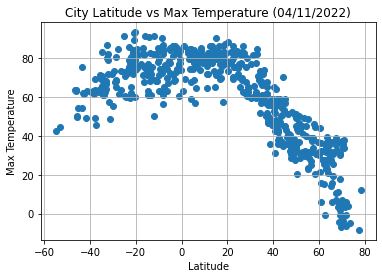

In [12]:
# Latitude vs Tempearture Plot
plt.scatter(latitude, max_temp)

plt.title("City Latitude vs Max Temperature (04/11/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.grid()

plt.savefig("City Latitude vs Max Temperature Plot")
plt.show()

## Latitude vs. Humidity Plot

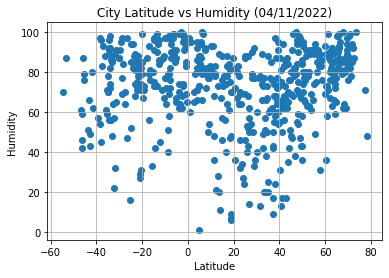

In [13]:
# Latitude vs Humidity Plot
plt.scatter(latitude, humidity)

plt.title("City Latitude vs Humidity (04/11/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()

plt.savefig("City Latitude vs Humidity Plot")
plt.show()

## Latitude vs. Cloudiness Plot

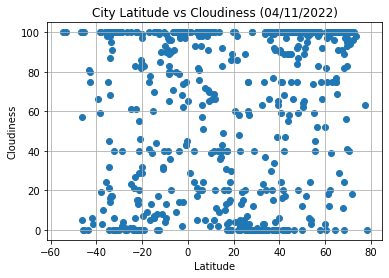

In [14]:
# Latitude vs Cloudiness Plot
plt.scatter(latitude, cloudiness)

plt.title("City Latitude vs Cloudiness (04/11/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid()

plt.savefig("City Latitude vs Cloudiness Plot")
plt.show()

## Latitude vs. Wind Speed Plot

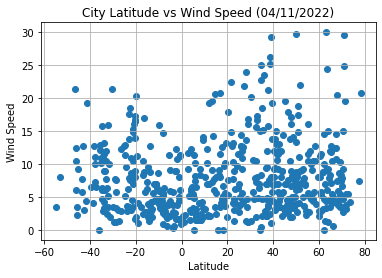

In [15]:
# Latitude vs Wind Speed Plot
plt.scatter(latitude, wind_speed)

plt.title("City Latitude vs Wind Speed (04/11/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid()

plt.savefig("City Latitude vs Wind Speed Plot")
plt.show()

## Linear Regression

In [16]:
# Creating norhtern and southern hemisphere
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]
# northern_hemisphere
# southern_hemisphere

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8995587470031362


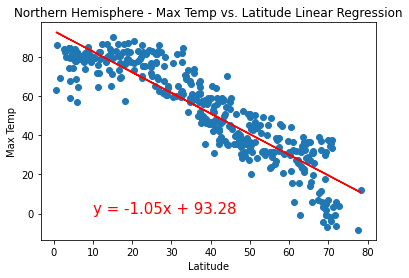

In [17]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (10,0), fontsize = 15, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Printing r-value
print(f"The r-value is: {rvalue}")

# Saving graph
plt.savefig("Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5302236717814859


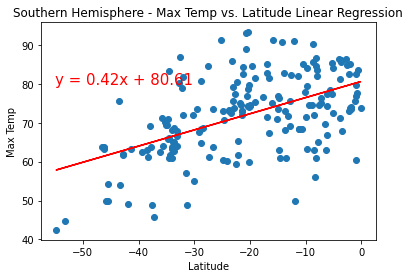

In [18]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (-55,80), fontsize = 15, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

# Printing r-value
print(f"The r-value is: {rvalue}")

# Saving graph
plt.savefig("Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.21750967080098355


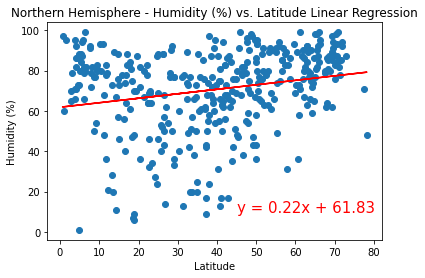

In [19]:
# Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (45,10), fontsize = 15, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

# Printing r-value
print(f"The r-value is: {rvalue}")

# Saving graph
plt.savefig("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.23818727356967254


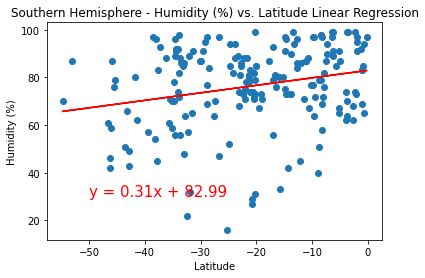

In [20]:
# Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (-50,30), fontsize = 15, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

# Printing r-value
print(f"The r-value is: {rvalue}")

# Saving graph
plt.savefig("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.27982374791621567


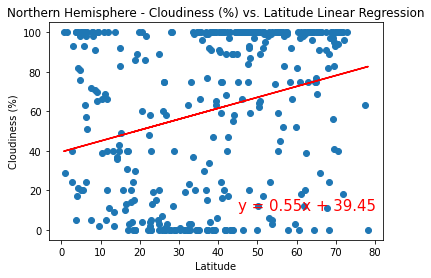

In [21]:
# Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (45,10), fontsize = 15, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

# Printing r-value
print(f"The r-value is: {rvalue}")

# Saving graph
plt.savefig("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.12790639034884033


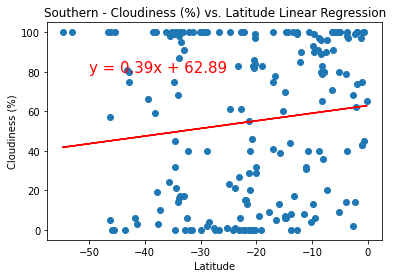

In [22]:
# Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (-50,80), fontsize = 15, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern - Cloudiness (%) vs. Latitude Linear Regression')

# Printing r-value
print(f"The r-value is: {rvalue}")

# Saving graph
plt.savefig("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.1010217971569717


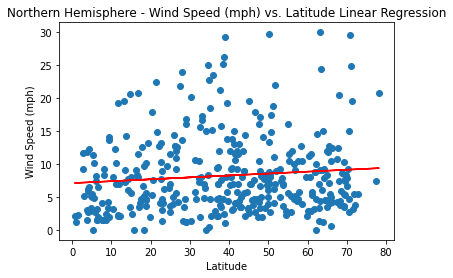

In [23]:
# Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = northern_hemisphere['Lat']
y_values = northern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (0,35), fontsize = 15, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

# Printing r-value
print(f"The r-value is: {rvalue}")

# Saving graph
plt.savefig("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.2552031315452188


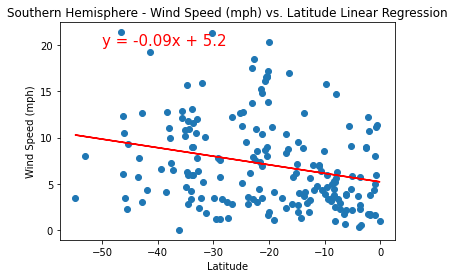

In [24]:
# Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression
x_values = southern_hemisphere['Lat']
y_values = southern_hemisphere['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq, (-50,20), fontsize = 15, color = "red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

# Printing r-value
print(f"The r-value is: {rvalue}")

# Saving graph
plt.savefig("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")
plt.show()